# Open Street Map Exposure Layer 
Setting up a high resolution exposure using OSM and boundary data from Haitidata.org


In [ ]:
!pip install osmnx==0.10
!pip install folium
!pip install seaborn
!conda install --yes geopandas
!pip install hdx-python-api

In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import seaborn as sns
import fiona
import climada.entity.exposures.open_street_map as OSM

2021-03-17 16:30:46,491 - climada - DEBUG - Loading default config file: /Users/zhangwenlan/miniconda3/climada_python-1.5.1/climada/conf/defaults.conf


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Get download link of shapefiles from Humdata
The dataset can also be downloaded directly from Humdata through a search

In [2]:
from hdx.hdx_configuration import Configuration
from hdx.data.dataset import Dataset

Configuration.create(hdx_site='prod', user_agent='A_Quick_Example', hdx_read_only=True)
dataset = Dataset.read_from_hdx('hotosm_hti_buildings')
resources = dataset.get_resources()
print(resources)
url, path = resources[0].download()
print('Resource URL %s downloaded to %s' % (url, path))

[{'cache_last_updated': None, 'package_id': 'baf82530-b20e-488f-ad40-2e5dfedcbd02', 'datastore_active': False, 'id': 'e2dfb3e4-f7e2-4131-8b19-7c4b17cada49', 'size': 0, 'metadata_modified': '2021-03-06T19:43:02.849854', 'download_url': 'https://export.hotosm.org/downloads/99a3722b-0f86-480d-897e-e17cfbf0544c/hotosm_hti_buildings_polygons_shp.zip', 'state': 'active', 'shape_info': '[{"error_class": "None", "layer_id": "None", "error_type": "None", "state": "processing", "timestamp": "2020-07-04T04:01:45.890259", "message": "The processing of the geo-preview has started"}, {"error_class": "JobTimeoutException", "layer_id": "pre_e2dfb3e4_f7e2_4131_8b19_7c4b17cada49", "error_type": "None", "state": "failure", "timestamp": "2020-07-04T04:06:47.263823", "message": "Task exceeded maximum timeout value (300 seconds)", "type": "unknown"}, {"error_class": "None", "layer_id": "None", "error_type": "None", "state": "processing", "timestamp": "2020-08-04T09:02:26.409819", "message": "The processing 

## Preparation

Get boundary data from Haitidata.org to clip the building shapefiles to required area

In [3]:
# save_path = '/home/ubuntu/Desktop/osm/new/' 
save_path = '/Users/zhangwenlan/Downloads'

In [6]:
gdf = gpd.read_file(save_path+'/hotosm_hti_buildings_polygons.shp')


In [44]:
# To confirm if the both shapefile CRS are same 
c = fiona.open(save_path+'/hotosm_hti_buildings_polygons.shp')
d = fiona.open('/home/ubuntu/Downloads/hti_boundaries_sections_communales_adm3_cnigs_polygon (1)')
crs = c.crs

crs1 = d.crs
crs1
crs

{'init': 'epsg:4326'}

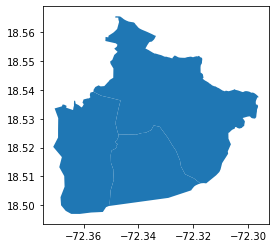

In [45]:
boundary = gpd.read_file('/home/ubuntu/Downloads/hti_boundaries_sections_communales_adm3_cnigs_polygon (1)') #For Port au Prince
boundary.plot()

In [46]:
boundary.section_


0         MARTISSANT
1    MORNE L'HOPITAL
2            TURGEAU
Name: section_, dtype: object

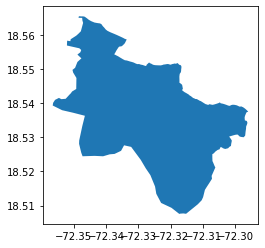

In [52]:
gdf_selection= boundary.loc[boundary['section_'] == 'TURGEAU'] #Turgeau has the least buildings for quicker processing times.
gdf_selection.plot()

In [53]:
Port_au_Prince = gpd.clip(Port_au_Prince, gdf_selection)
Port_au_Prince.shape


(13513, 12)

In [54]:
Port_au_Prince

,osm_id,buildingma,addrhousen,name,buildingle,building,addrstreet,addrfull,addrcity,office,source,geometry
1,27937322.0,None,None,Cathédrale Notre-Dame de L'Assomption,None,ruins,None,None,Pòtoprens,None,http://haiti.ushahidi.com/,"POLYGON ((-72.33905 18.54900, -72.33899 18.549..."
4,48215538.0,None,None,NATCOM,None,office,None,None,None,telecommunication,survey; Bing,"POLYGON ((-72.32340 18.53623, -72.32323 18.536..."
5,48215541.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.32293 18.53766, -72.32281 18.538..."
6,48215545.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.32488 18.53884, -72.32480 18.539..."
7,48215556.0,None,29,Centre Hospitalier de la Rue Berne,None,yes,Rue Berne,None,None,None,None,"POLYGON ((-72.32614 18.53888, -72.32601 18.539..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1049973,914061217.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.34545 18.55172, -72.34544 18.551..."
1049974,914061218.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.34592 18.55180, -72.34590 18.551..."
1049975,914061220.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.34544 18.55128, -72.34542 18.551..."
1049976,914061222.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.34631 18.55124, -72.34630 18.551..."


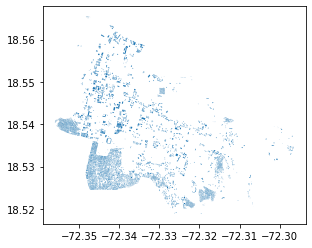

In [55]:
%matplotlib inline
Port_au_Prince.plot()

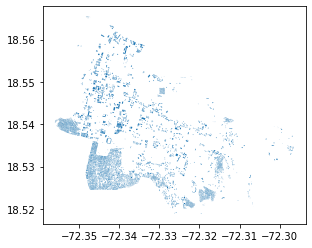

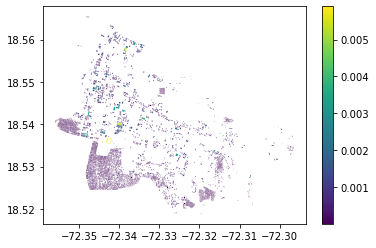

In [69]:
# Plot the buildings and color code them according to their area.

Port_au_Prince["area"] = Port_au_Prince['geometry'].to_crs({'init': 'epsg:32618'})\
               .map(lambda p: p.area / 10**6)
Port_au_Prince.plot()

fig, ax = plt.subplots(1, 1)
Port_au_Prince.plot(column='area', ax=ax, legend=True)


In [70]:
Port_au_Prince.to_file("/home/ubuntu/Desktop/osm/new/Port_au_Prince_buildings.shp")


In [14]:
file = gpd.read_file("/home/ubuntu/Desktop/osm/new/Port_au_Prince_buildings.shp")
file.to_file("Port_au_Prince_buildings.json", driver="GeoJSON")

### Get shapefiles directly from OSM (Requires more than 8GB RAM!)

In [ ]:
#place = "Haiti"
#buildings = ox.footprints_from_place(place)

We are going to assign values to building shapes based on their polygon area:
    default option --> 5'400 Chf / m^2
    
This process takes a while

2021-03-17 16:47:41,531 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.
2021-03-17 16:47:41,820 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2021-03-17 16:47:41,821 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2021-03-17 16:47:41,821 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2021-03-17 16:47:41,822 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2021-03-17 16:47:41,822 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2021-03-17 16:47:41,823 - climada.entity.exposures.base - INFO - Setting if_ to default impact functions ids 1.
2021-03-17 16:47:41,826 - climada.entity.exposures.base - INFO - centr_ not set.
2021-03-17 16:47:41,827 - climada.entity.exposures.base - INFO - deductible not set.
2021-03-17 16:47:41,827 - climada.

/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['buildingma', 'addrhousen', 'name', 'buildingle', 'building',
       'addrstreet', 'addrfull', 'addrcity', 'office', 'source', 'geo_polys',
       'geometry'],
      dtype='object')]

  if __name__ == '__main__':
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warni

Finished in 965.6406 seconds


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)


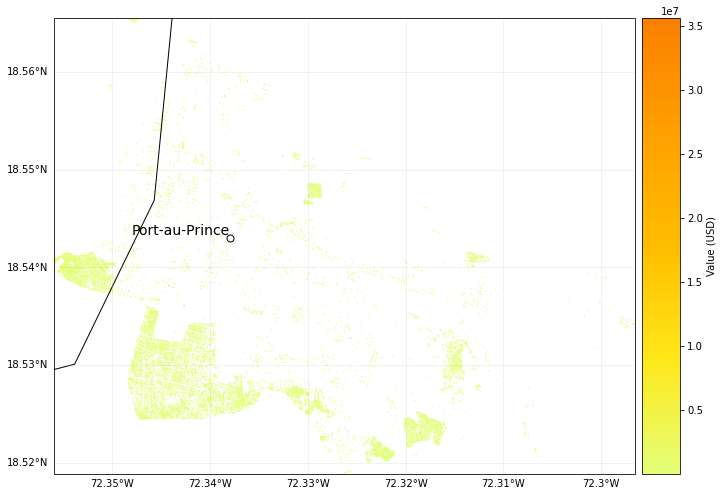

In [4]:
# Default

import time

tic = time.perf_counter()

buildings_47_8_default = OSM.make_osmexposure('/Users/zhangwenlan/Downloads/Port_au_Prince_buildings/Port_au_Prince_buildings.shp',
                                              mode = 'default', 
                                            save_path = save_path, check_plot=1)

toc = time.perf_counter()
print(f"Finished in {toc - tic:0.4f} seconds")